In [1]:
import os
import shutil
import sys
sys.path.append('/mnt/g/My Drive/Python_Code/')
sys.path.append('/mnt/data01/Code/')

import glob
import tqdm
import contextlib
import io

import NDH_Tools as ndh
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42

import xarray as xr
import rioxarray as rxr


In [2]:
neem_lat = 77.45
neem_lon = -51.05

neem_xy = ndh.polarstereo_fwd(neem_lat,neem_lon)

neem_files = ndh.find_cresisfiles_xy(
    1,
    0,
    np.array([neem_xy['x'],neem_xy['y'],1000]),
    filename_or_aggregateddata=0,
    remove_totaldata=1,
    subset_by_outline=1,
    earliest_year=2010,
)

#for fn in neem_files['filenames']:
#    file_info = ndh.find_cresisfiles(fn)
#
neem_files

{'filenames': array(['/mnt/data01/Data/RadarData/CReSIS_Filestructure/ct_data/rds/2011_Greenland_P3/CSARP_standard/20110329_02/Data_20110329_02_027.mat',
        '/mnt/data01/Data/RadarData/CReSIS_Filestructure/ct_data/rds/2011_Greenland_P3/CSARP_standard/20110329_02/Data_20110329_02_028.mat',
        '/mnt/data01/Data/RadarData/CReSIS_Filestructure/ct_data/rds/2011_Greenland_P3/CSARP_standard/20110506_01/Data_20110506_01_010.mat',
        '/mnt/data01/Data/RadarData/CReSIS_Filestructure/ct_data/rds/2011_Greenland_P3/CSARP_standard/20110506_01/Data_20110506_01_027.mat',
        '/mnt/data01/Data/RadarData/CReSIS_Filestructure/ct_data/rds/2011_Greenland_P3/CSARP_standard/20110506_01/Data_20110506_01_028.mat',
        '/mnt/data01/Data/RadarData/CReSIS_Filestructure/ct_data/rds/2011_Greenland_P3/CSARP_standard/20110506_02/Data_20110506_02_007.mat',
        '/mnt/data01/Data/RadarData/CReSIS_Filestructure/ct_data/rds/2011_Greenland_P3/CSARP_standard/20110506_02/Data_20110506_02_008.mat',


(4e-05, 0.0)

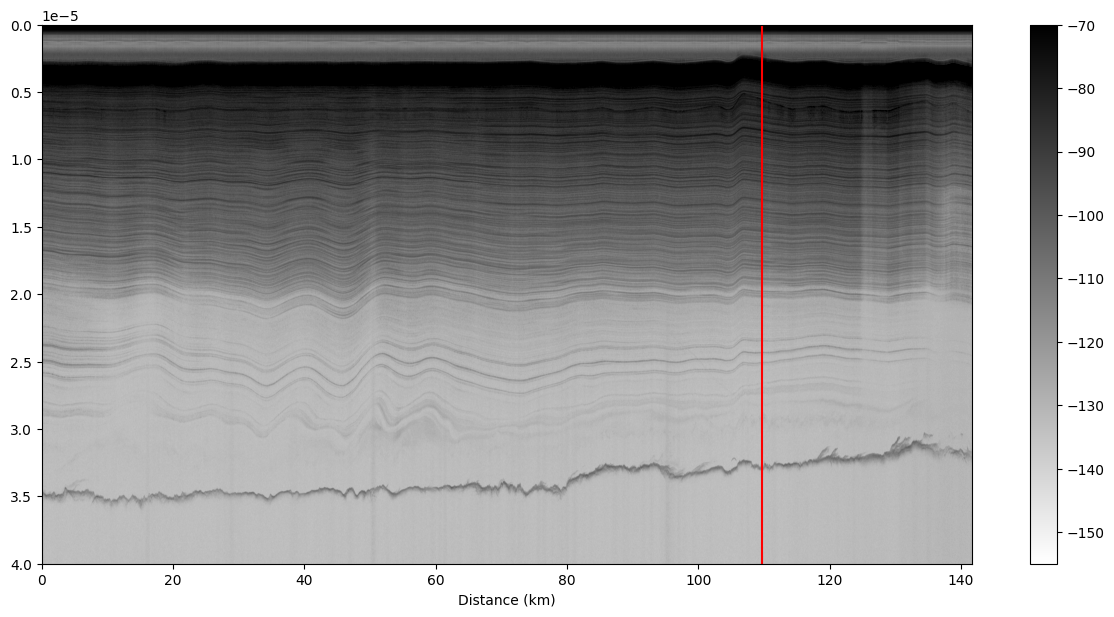

In [31]:
gl = xr.open_dataset('/mnt/data01/Data/Greenland_BedElevation/BedMachineGreenland-v5-2022-09-01.nc')
fstring = 'Data_20110506_02_007'
add_on = [-1,0,1]

file_list = []
file_list_sar = []
file_list_music = []
file_list_qlook = []
for i in add_on:
    file_info = ndh.find_cresisfiles(fstring,plus_or_minus_frames=i)
    file_list.append(file_info['standard'][0])
    file_list_sar.append(file_info['standard'][1])
    file_list_music.append(file_info['music'][0])
    file_list_qlook.append(file_info['qlook'][-1])

radar_data,depth_data = ndh.radar_load(file_list,1,0)
target_dist_ind = ndh.find_nearest_xy(np.stack([radar_data['x'],radar_data['y']]).T,np.stack([neem_xy['x'],neem_xy['y']]).T)

plt.axvline(radar_data['distance'][target_dist_ind['index'][0]]/1000,c='red')

im = plt.gci()
im.set_clim(vmin=-155, vmax=-70)
#plt.gca().set_ylim(-300,2700)
plt.gca().set_ylim(40e-6,0)

Center Frequency: 195000000.0


100%|██████████████████████████████████████| 2843/2843 [00:05<00:00, 490.53it/s]


Center Frequency: 195000000.0


100%|█████████████████████████████████████| 3007/3007 [00:01<00:00, 1925.54it/s]


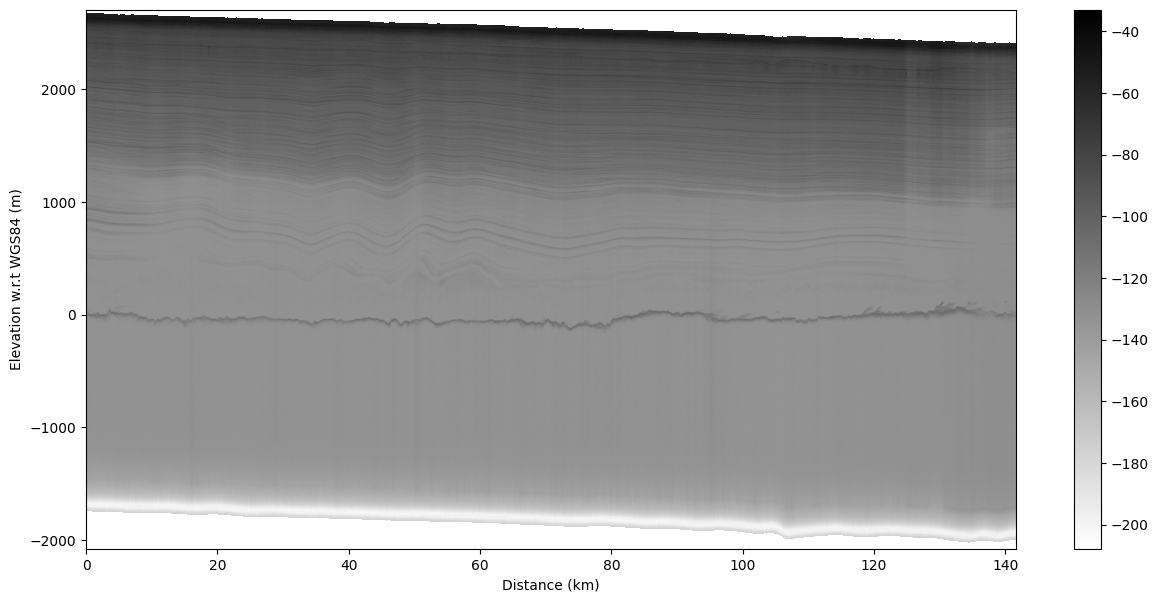

In [4]:
radar_data,depth_data = ndh.radar_load(file_list,1)
doppler_data1,doppler_data_depth1 = ndh.radar_load(file_list_sar,0)
doppler_data2,doppler_data_depth2 = ndh.radar_load(file_list_qlook,0)

dd1 = ndh.delay_doppler(doppler_data1)
dd2 = ndh.delay_doppler(doppler_data2)
music_data = ndh.radar_load_music(file_list_music)

rxy1 = np.stack([radar_data['x'],radar_data['y']]).T

After Generating the Writer, include the following:
Outside the loop:      with writer.saving(fig, videoname, 100):
To capture a frame:    writer.grab_frame()
Using the FFMpeg writer


100%|█████████████████████████████████████████| 569/569 [09:59<00:00,  1.05s/it]


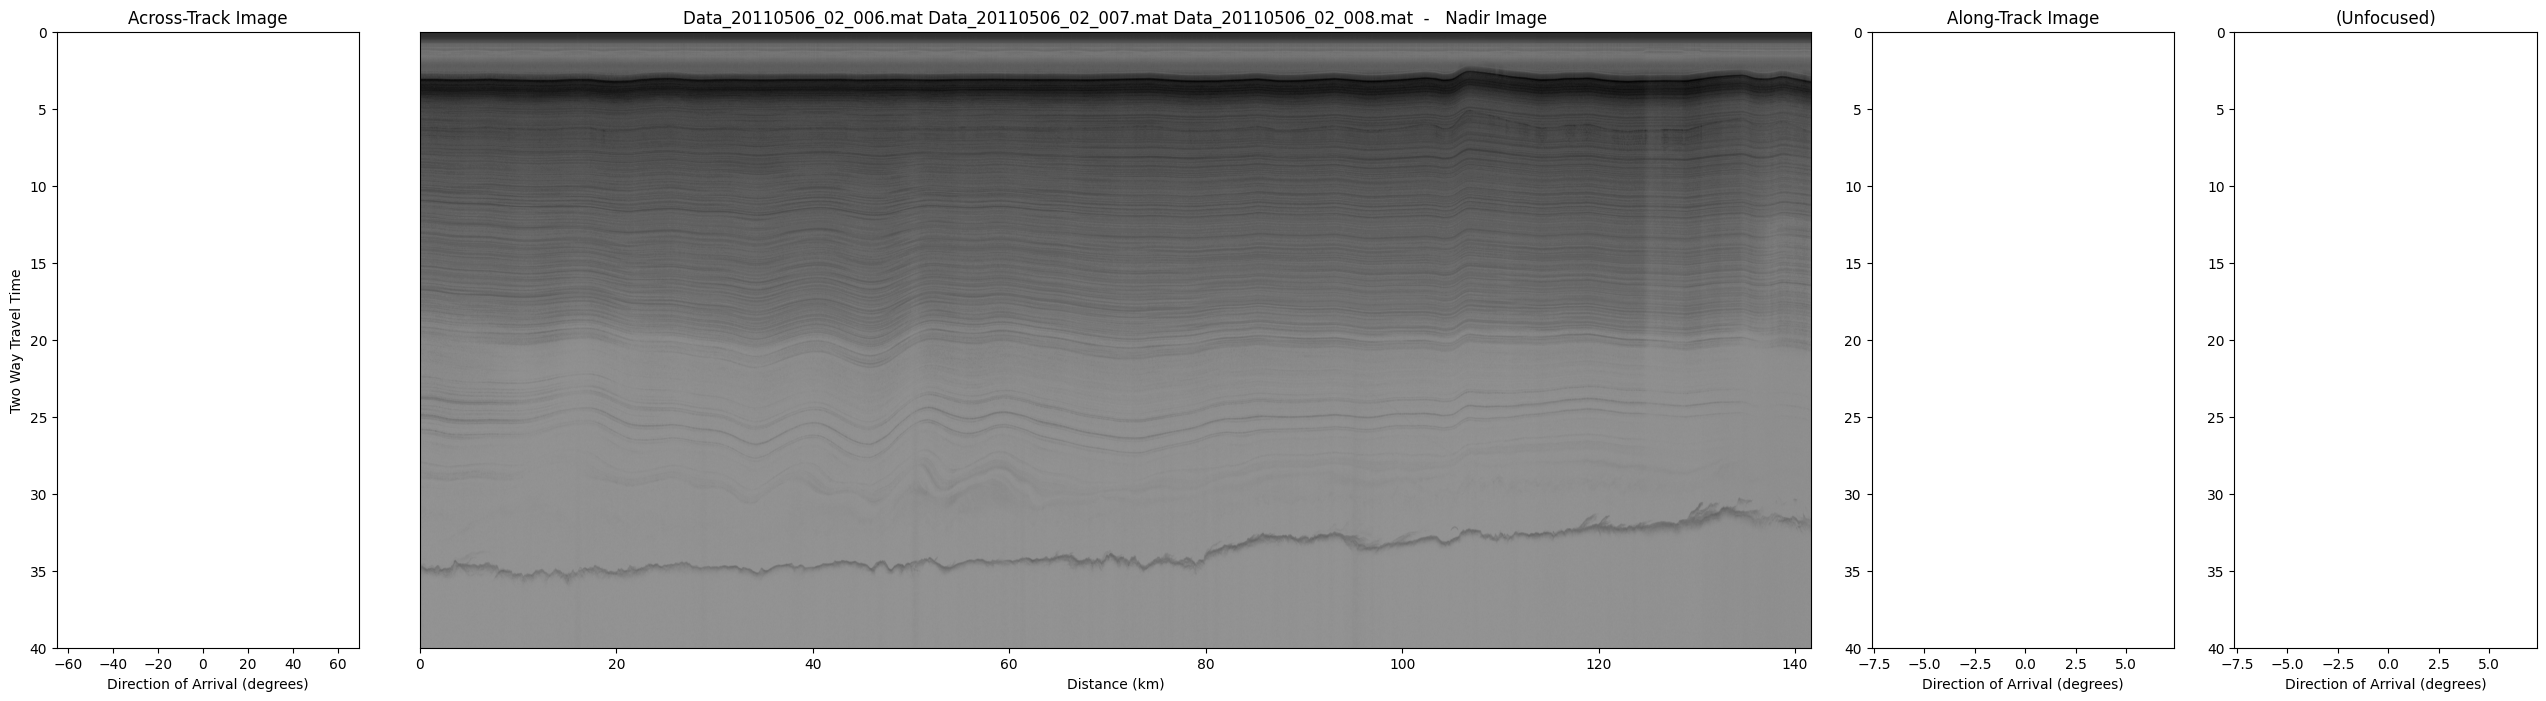

In [5]:
ndh.animate_delay_doppler2_music('Supp0.mp4',radar_data,depth_data,music_data,dd1,dd2,5,40)

In [6]:
ndh.show_video('Supp0.mp4')

In [7]:
file_info = ndh.find_cresisfiles('Data_20130423_01_022')
radar_data,depth_data = ndh.radar_load(file_info['standard'][0],1)
doppler_data1,doppler_data_depth1 = ndh.radar_load(file_info['standard'][1],0)
doppler_data2,doppler_data_depth2 = ndh.radar_load(file_info['qlook'][1],0)

dd1 = ndh.delay_doppler(doppler_data1)
dd2 = ndh.delay_doppler(doppler_data2)
music_data = ndh.radar_load_music(file_info['music'][0])

ndh.animate_delay_doppler2_music('Supp2.mp4',radar_data,depth_data,music_data,dd1,dd2,20,40)

Center Frequency: 195000000.0


100%|████████████████████████████████████████| 997/997 [00:01<00:00, 574.62it/s]


Center Frequency: 195000000.0


100%|██████████████████████████████████████| 1017/1017 [00:01<00:00, 525.62it/s]


After Generating the Writer, include the following:
Outside the loop:      with writer.saving(fig, videoname, 100):
To capture a frame:    writer.grab_frame()
Using the FFMpeg writer


100%|███████████████████████████████████████████| 50/50 [00:14<00:00,  3.43it/s]


In [8]:
ndh.show_video('Supp2.mp4')

Center Frequency: 195000000.0


100%|████████████████████████████████████████| 997/997 [00:01<00:00, 558.55it/s]


Center Frequency: 195000000.0


100%|██████████████████████████████████████| 1011/1011 [00:01<00:00, 515.24it/s]


After Generating the Writer, include the following:
Outside the loop:      with writer.saving(fig, videoname, 100):
To capture a frame:    writer.grab_frame()
Using the FFMpeg writer


100%|█████████████████████████████████████████| 499/499 [02:39<00:00,  3.13it/s]


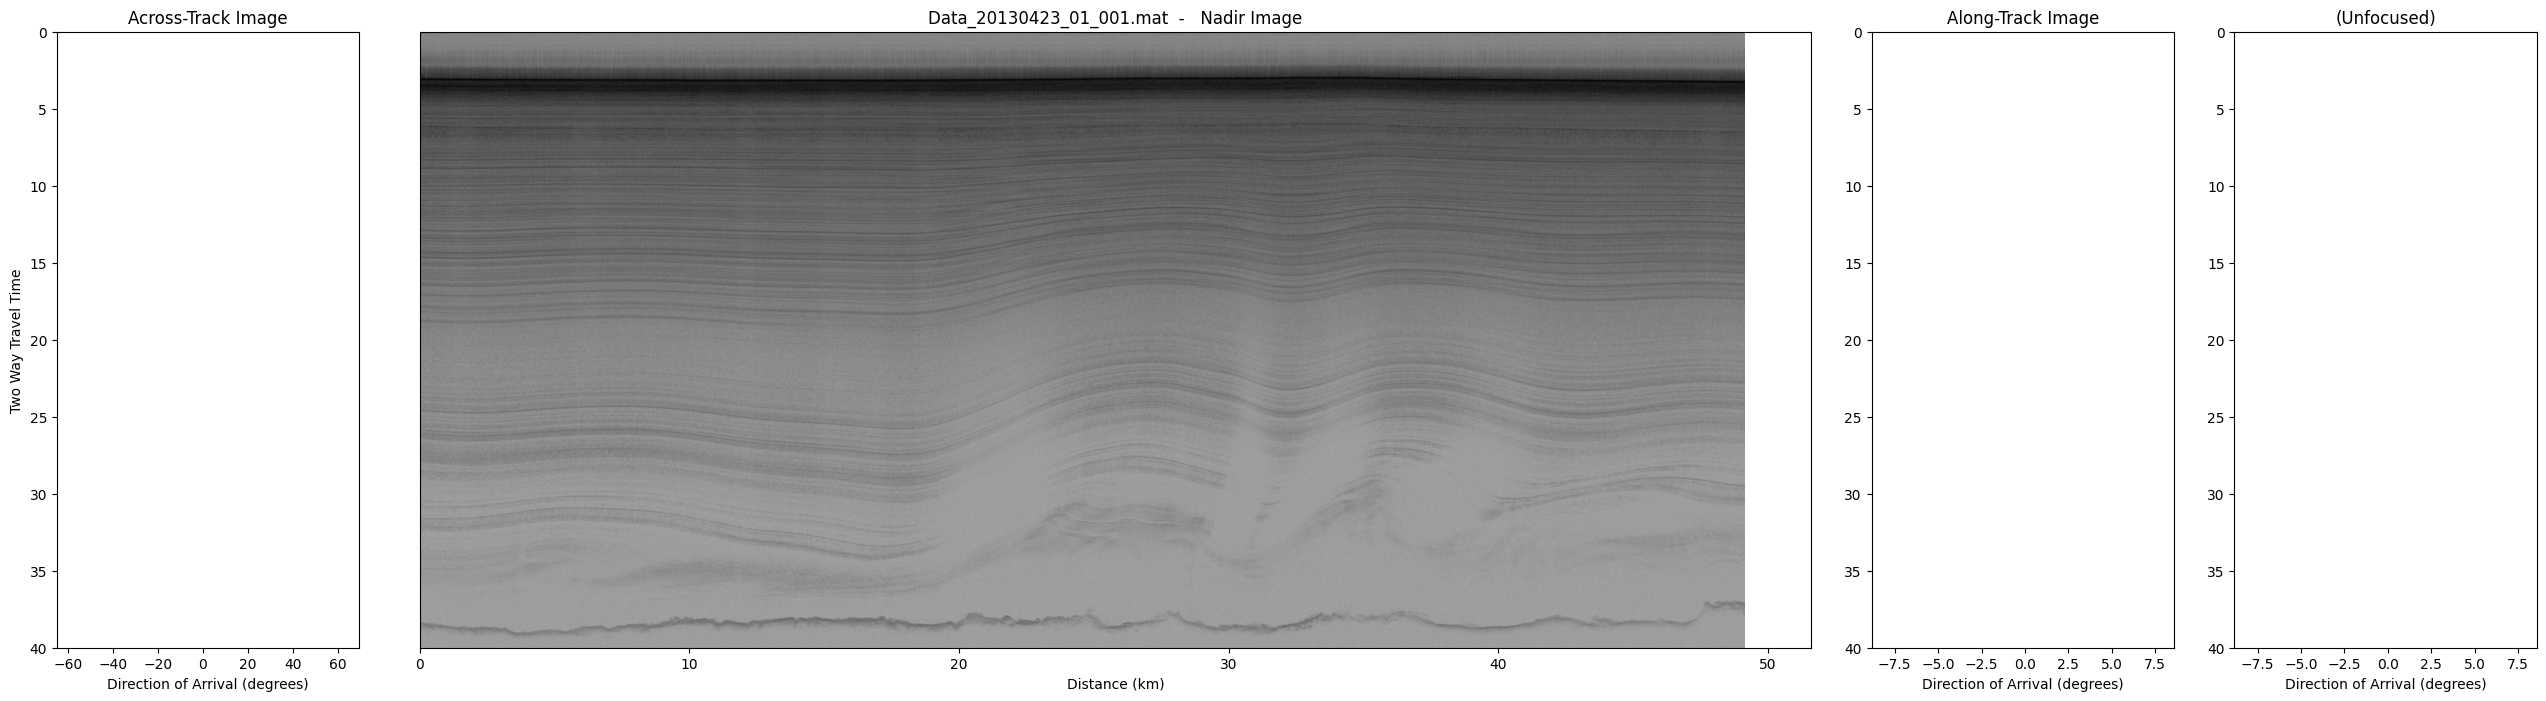

In [9]:
file_info = ndh.find_cresisfiles('Data_20130423_01_001')
radar_data,depth_data = ndh.radar_load(file_info['standard'][0],1)
doppler_data1,doppler_data_depth1 = ndh.radar_load(file_info['standard'][1],0)
doppler_data2,doppler_data_depth2 = ndh.radar_load(file_info['qlook'][1],0)
dd1 = ndh.delay_doppler(doppler_data1)
dd2 = ndh.delay_doppler(doppler_data2)
music_data = ndh.radar_load_music(file_info['music'][0])

ndh.animate_delay_doppler2_music('Supp3.mp4',radar_data,depth_data,music_data,dd1,dd2,2,40)


rxy3 = np.stack([radar_data['x'],radar_data['y']]).T

In [10]:
ndh.show_video('Supp3.mp4')

(4e-05, 0.0)

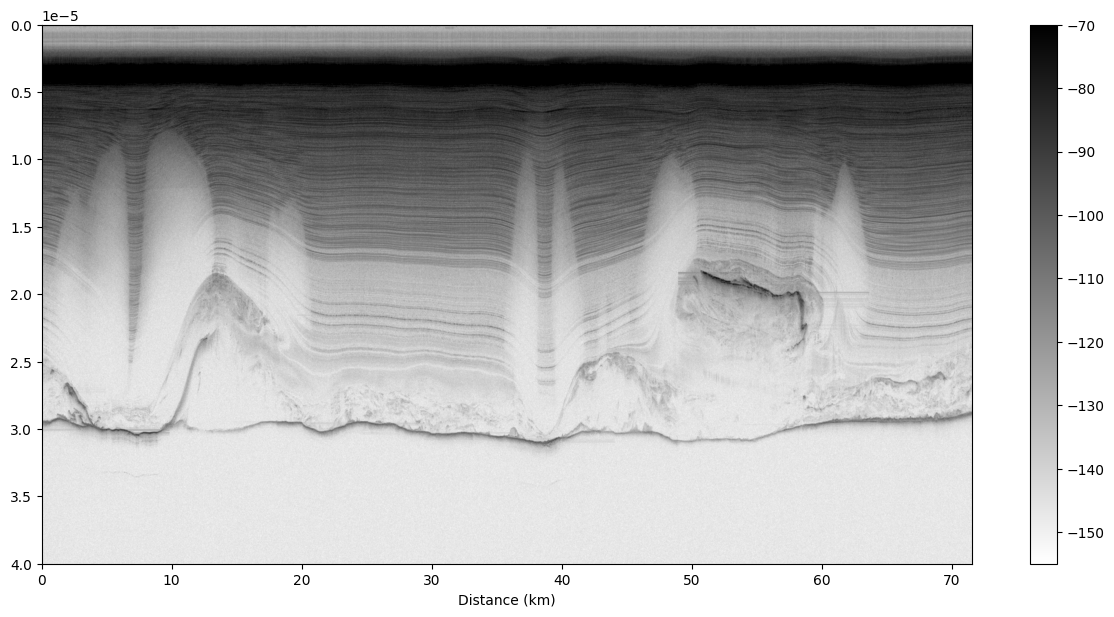

In [32]:
fstring = 'Data_20120514_02_051'
add_on = [0,1]

file_list = []
file_list_sar = []
file_list_music = []
file_list_qlook = []
for i in add_on:
    file_info = ndh.find_cresisfiles(fstring,plus_or_minus_frames=i)
    file_list.append(file_info['standard'][0])
    file_list_sar.append(file_info['standard'][1])
    file_list_music.append(file_info['music'][0])
    file_list_qlook.append(file_info['qlook'][-1])

radar_data,depth_data = ndh.radar_load(file_list,1,0)
target_dist_ind = ndh.find_nearest_xy(np.stack([radar_data['x'],radar_data['y']]).T,np.stack([neem_xy['x'],neem_xy['y']]).T)


im = plt.gci()
im.set_clim(vmin=-155, vmax=-70)
#plt.gca().set_ylim(-300,2300)
plt.gca().set_ylim(40e-6,0)

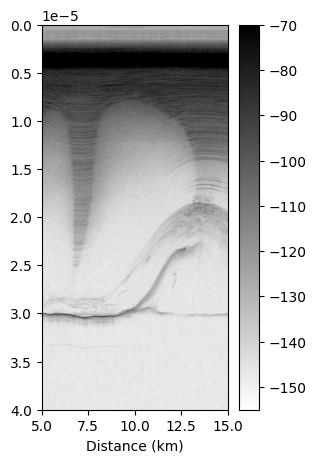

In [34]:
radar_data,depth_data = ndh.radar_load(file_list,1,0)
im = plt.gci()
im.set_clim(vmin=-155, vmax=-70)
plt.gca().set_ylim(40e-6,0)
plt.gca().set_xlim(5,15)
plt.gcf().set_size_inches(3, 5)

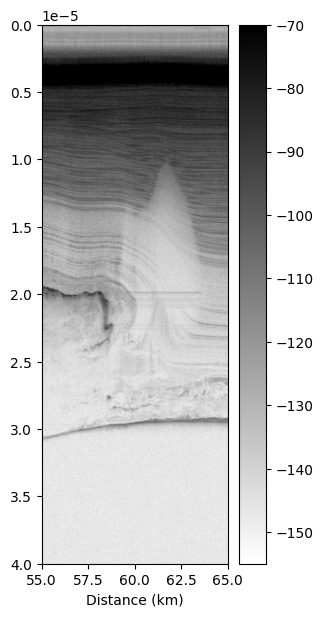

In [36]:
radar_data,depth_data = ndh.radar_load(file_list,1,0)
im = plt.gci()
im.set_clim(vmin=-155, vmax=-70)
plt.gca().set_ylim(40e-6,0)
plt.gca().set_xlim(55,65)
plt.gcf().set_size_inches(3, 7)

In [17]:
radar_data,depth_data = ndh.radar_load(file_list,1)
doppler_data1,doppler_data_depth1 = ndh.radar_load(file_list_sar,0)
doppler_data2,doppler_data_depth2 = ndh.radar_load(file_list_qlook,0)

dd1 = ndh.delay_doppler(doppler_data1)
dd2 = ndh.delay_doppler(doppler_data2)
music_data = ndh.radar_load_music(file_list_music)

rxy4 = np.stack([radar_data['x'],radar_data['y']]).T

Center Frequency: 195000000.0


100%|██████████████████████████████████████| 1420/1420 [00:02<00:00, 497.05it/s]


Center Frequency: 195000000.0


100%|█████████████████████████████████████| 1571/1571 [00:00<00:00, 1655.22it/s]


After Generating the Writer, include the following:
Outside the loop:      with writer.saving(fig, videoname, 100):
To capture a frame:    writer.grab_frame()
Using the FFMpeg writer


100%|█████████████████████████████████████████| 284/284 [01:10<00:00,  4.00it/s]


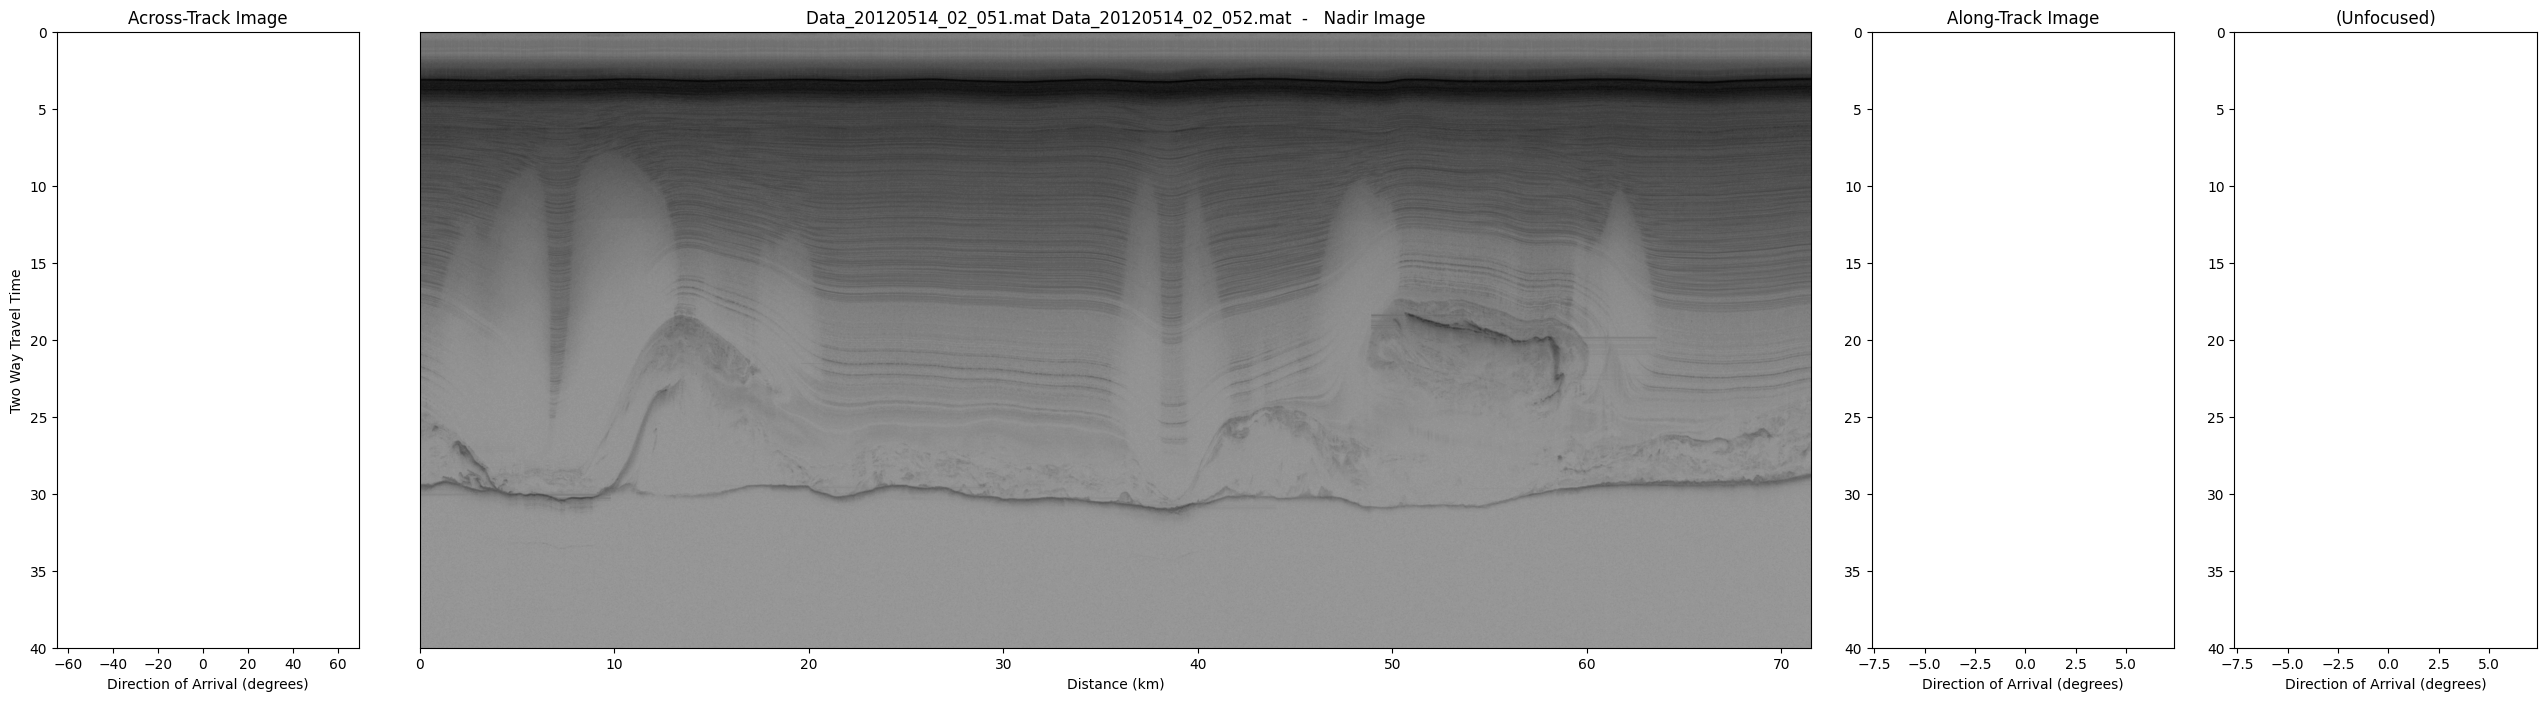

In [18]:

ndh.animate_delay_doppler2_music('Supp4.mp4',radar_data,depth_data,music_data,dd1,dd2,5,40)

In [19]:
ndh.show_video('Supp4.mp4')

In [ ]:
gl['bed'][::2,::2].plot.imshow(cmap='terrain')
plt.plot(neem_xy['x'],neem_xy['y'],'o',c='red')
plt.plot(radar_data['x'],radar_data['y'],c='blue')
plt.plot(radar_data['x'][0],radar_data['y'][0],'^',c='blue',ms=3)

In [15]:
test = ndh.loadmat('/mnt/data01/Data/RadarData/Antarctica/2009_Antarctica_TO/CSARP_surfData/20091229_01/Data_20091229_01_003.mat')
test['surf']['name']

['top',
 'bottom',
 'ice mask',
 'bottom gt',
 'bottom extract',
 'bottom detect',
 'top gt',
 'top quality',
 'bottom quality']

In [14]:
test

{}

In [40]:
file_info = ndh.find_cresisfiles('Data_20100413_02_012')
radar_data,depth_data = ndh.radar_load(file_info['standard'][0],1)
doppler_data1,doppler_data_depth1 = ndh.radar_load(file_info['standard'][1],0)
doppler_data2,doppler_data_depth2 = ndh.radar_load(file_info['qlook'][0],0)

dd1 = ndh.delay_doppler(doppler_data1)
dd2 = ndh.delay_doppler(doppler_data2)
music_data = ndh.radar_load_music(file_info['music'][0])

ndh.animate_delay_doppler2_music('Supp6.mp4',radar_data,depth_data,music_data,dd1,dd2,2,40)

Center Frequency: 193900000.0


100%|██████████████████████████████████████| 1373/1373 [00:01<00:00, 984.42it/s]


Center Frequency: 193900000.0


100%|█████████████████████████████████████| 1510/1510 [00:00<00:00, 3108.90it/s]


After Generating the Writer, include the following:
Outside the loop:      with writer.saving(fig, videoname, 100):
To capture a frame:    writer.grab_frame()
Using the FFMpeg writer


100%|█████████████████████████████████████████| 687/687 [02:56<00:00,  3.89it/s]


In [41]:
ndh.show_video('Supp6.mp4')

In [56]:
gl = xr.open_dataset('/mnt/data01/Data/Greenland_BedElevation/BedMachineGreenland-v5-2022-09-01.nc')
fstring = 'Data_20140515_02_049'
add_on = [0,1]

file_list = []
file_list_sar = []
file_list_music = []
file_list_qlook = []
for i in add_on:
    file_info = ndh.find_cresisfiles(fstring,plus_or_minus_frames=i)
    file_list.append(file_info['standard'][0])
    file_list_sar.append(file_info['standard'][0])
    file_list_music.append(file_info['music'][0])
    file_list_qlook.append(file_info['qlook'][-1])

IndexError: list index out of range

In [54]:

radar_data,depth_data = ndh.radar_load(file_list,1)